In [1]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

################################################################################
#
#    PLOTTING OPTIONS
#
################################################################################


# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [2]:
h1 = '/work/ahnitz/projects/3ogc/prod/results/bbh-inj3/O3/6/full_data/H1-HDF_TRIGGER_MERGE_FULL_DATA-1241731918-772083.hdf'
l1 = '/work/ahnitz/projects/3ogc/prod/results/bbh-inj3/O3/6/full_data/L1-HDF_TRIGGER_MERGE_FULL_DATA-1241731918-772083.hdf'

In [3]:
ifo1 = h1.split('/')[-1][0:2]
ifo2 = l1.split('/')[-1][0:2]

In [4]:
h1_trigs = h5py.File(h1, 'r')
h1_times_all = h1_trigs[ifo1+'/end_time'][:]

# reading end_time
l1_trigs = h5py.File(l1, 'r')
l1_times_all = l1_trigs[ifo2+'/end_time'][:]

# reading psd_var
h1_psdvar_all = h1_trigs[ifo1+'/psd_var_val'][:]
l1_psdvar_all = l1_trigs[ifo2+'/psd_var_val'][:]

In [5]:
h1_trigs['H1']['search']

<HDF5 group "/H1/search" (6 members)>

In [6]:
h1_trigs['H1']['search']['run_time'][:]

array([ 4914.39029503,  5743.66712952,  7845.22949934,  7826.28339863,
        7592.7856791 ,  7662.34748602,  8035.69002771,  6428.83542466,
        6397.35938096,  7832.2991457 ,  8057.09876108,  6212.19493437,
        5748.11460805,  3266.47911739,  5503.20180941,  8808.88032532,
        7847.59795713,  7851.9458313 ,  9143.27496719,  9192.40973902,
        3314.60361218,  8212.0653367 ,  8582.69631028,  3903.50554419,
        7480.92898822,  7715.9105866 ,  7341.76177621,  8747.6974988 ,
        6757.670542  ,  3363.10727143,  6734.35582232,  3823.80439997,
        3218.04745913,  7967.61728096,  8141.71998405,  5296.45018601,
        5830.26150846,  6287.3444159 ,  8125.94335198,  3998.36461401,
        3962.96191406,  8281.56009746,  7916.94526076,  8169.67665172,
        7556.42643952,  3682.01330614,  8273.96648598,  7474.2067821 ,
        8030.69152951,  3921.05608916,  7179.20328188,  9254.58186126,
        6812.78281856,  7750.23739576,  6672.59192872,  8054.88649487,
      

In [7]:
gps = 1242442967.444
gps_start_time = 1242442967.444 - 1800
gps_end_time = 1242442967.444 + 1800

# reduce size of arrays
h1_intime = np.logical_and(h1_times_all >=gps_start_time, h1_times_all <= gps_end_time )
l1_intime = np.logical_and(l1_times_all >=gps_start_time, l1_times_all <= gps_end_time )

h1_times = h1_times_all[h1_intime]
l1_times = l1_times_all[l1_intime]

h1_psdvar = h1_psdvar_all[h1_intime]
l1_psdvar = l1_psdvar_all[l1_intime]

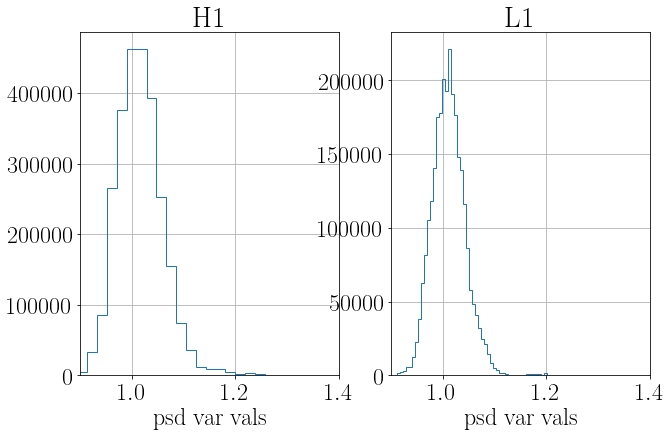

In [8]:
# Make plots of PSD var values
plt.figure()
plt.subplot(121)
plt.hist(h1_psdvar,bins=50,histtype='step')
plt.xlim(0.9,1.4)
plt.title('H1')
plt.xlabel('psd var vals')
plt.subplot(122)
plt.hist(l1_psdvar,bins=50,histtype='step')
plt.xlim(0.9,1.4)
plt.title('L1')
plt.xlabel('psd var vals')
plt.show()

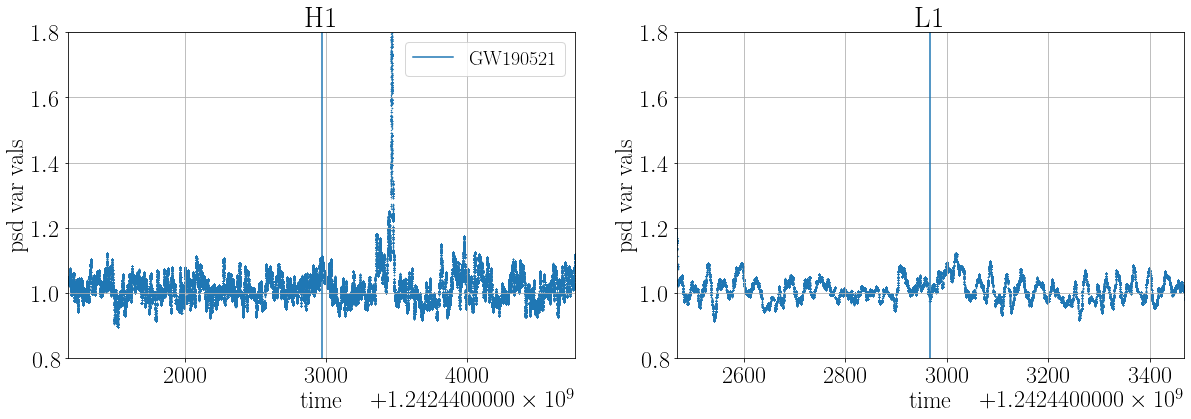

In [13]:
gps = 1242442967.444
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.scatter(h1_times,h1_psdvar,s=0.01)
plt.axvline(x=gps,label='GW190521')
plt.title('H1')
plt.xlim(gps-1800,gps+1800)
plt.ylim(0.8,1.8)
plt.ylabel('psd var vals')
plt.xlabel('time')
plt.legend()

plt.subplot(122)
plt.scatter(l1_times,l1_psdvar,s=0.01)
plt.axvline(x=gps)
plt.title('L1')
plt.ylabel('psd var vals')
plt.xlabel('time')
plt.ylim(0.8,1.8)
plt.xlim(gps-1800,gps+1800)
plt.show()